In [249]:
# Tutorial on Linear Regression

# Linear Regression
Supervised learning algorithm where we use input and output data points to find a best fit curve. More generally, we can say that this is, modeling the relationship between input and output data points.

Let's take a general linear equation:
$$ Y = W\cdot X + b + \epsilon $$
Here capital letter are being used for representing vectors, while small letters for constants

$ X \implies$ vector correspomding to the set of inputs

$ Y \implies $ vector corresponding to the set of outputs

But notice that, we can always break vector $ Y $ into components and finally a constant
$$ y = W\cdot X + b + \epsilon $$
$$ y = W\cdot X + \epsilon $$
Here dimension of $ X $ will be one more than previous dimension of $ X $

Now we have various data points, so
$$ y_i = W\cdot X_i + {\epsilon}_i $$
$$ y_i - W\cdot X_i = {\epsilon}_i $$

Take summation over $i$ on both side
$$ \sum_{i} (y_i - W\cdot X_i) = \sum_{i} {{\epsilon}_i}$$
Hence $$ \epsilon = \sum_{i} {y_i - W\cdot X_i} $$

Now a negative error should not nullify a positie error so taking square and let's say this function $ s $ so
$$ s = \sum_{i} (y_i - W\cdot X_i)^2$$
So now we have to minimise $ s $ to get best fit vector $ W $

We use partial derivative,
$$ \frac{\partial s}{\partial W} = 2\sum_{i} (y_i - W\cdot X_i)X_i = 0 $$
So, $$ \sum_{i} (y_i - W\cdot X_i)X_i = 0 $$
$$ \sum_{i} X_i(y_i - W\cdot X_i) = 0 $$
$$ \sum_{i} X_i(y_i - X_i^\intercal W) = 0 $$
$$ \sum X_i y_i = \sum X_i X_i^\intercal W $$

Note that $ X_i X_i^\intercal $ is a square matrix

1) Suppose we could take it's inverse
Then $$ W = \sum (X_i X_i^\intercal)^{-1} X_i Y_i $$
Now calculating this equation we will have answer

2) If inverse is not possible : Then we need to use Singular Value Decomposition theorem.


# Singular Value Decomposition
Any real-valued matrix $ A ∈ R^n $ can be represented as the product of three special, not necessary unique matrices,
$ A = UDV^\intercal $. The matrices $ U,V $ are orthonormal and $D$ is a $ m × n $ matrix with only main diagonal non-zero
elements.

So, $ U\cdot U^T = 1$, $ V\cdot V^T = 1$ and $ \forall i \neq j : D_{i, j} = 0 $


In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import autograd.numpy as np
import autograd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [319]:
# Read data set
df = pd.read_csv("C:\Documents\Sem4\ML\LAB\A1\Data1.csv")
# Merging the constant factor with other coefficients
df.insert(loc = 0, column='x0', value=[1 for _ in range(len(df))])
df.rename(columns={'x': 'x1'}, inplace=True)
# df.drop(columns="x0", inplace=True)
# df.to_csv("C:\Documents\Sem4\ML\LAB\A1\Data4.csv", index = False)

In [252]:
df

,x0,x,y
0,1,0.1,1.159563
1,1,0.2,1.002381
2,1,0.3,0.935920
3,1,0.4,0.016261
4,1,0.5,1.172652
...,...,...,...
95,1,9.6,2.267108
96,1,9.7,2.351145
97,1,9.8,1.957880
98,1,9.9,1.426106


In [253]:
# Plot the graph
def plot2D(dataFrame):
	if dataFrame.shape[1] - 1 != 2:
		print("This is not a 2-D graph")
	else:
		fig = px.scatter(dataFrame, x='x1', y='y', title='2D Scatter Plot',
                 labels={'X': 'X-axis', 'Y': 'Y-axis'})
		fig.show()


In [262]:
plot2D(df)

In [ ]:
def plot3D(dataFrame):
	if dataFrame.shape[1] - 1 != 3:
		print("This is not a 3-D graph")

	else:
		# Create an interactive 3D scatter plot with Plotly
		fig = px.scatter_3d(df, x=df.columns[0], y=df.columns[1], z=df.columns[2], title='3D Plot for Visualization',
							labels={'x1': 'Predictor1', 'x2': 'Predictor2', 'y': 'Predicate'})
		fig.show()



In [ ]:
plot3D(df)

This is not a 3-D graph


In [263]:
# Multi Variate Linear Regression
def multiLinearReg(dataFrame):
    # Making column vecor X
    X = dataFrame.iloc[:, :-1].values   # Gives a 2-D np.array
    y = dataFrame.iloc[:, -1:].values   # 1st argument selects row and 2nd column
    # print(y)
    dimension = len(dataFrame.columns)-1
    matrix = np.zeros((dimension, dimension))
    vector = np.zeros((dimension, 1))
    for i in range(len(X)):
        y_i = np.array(y[i][0]).reshape(-1, 1)
        X_i = np.array(X[i]).reshape(-1, 1)
        X_i_T = np.transpose(X_i)       # X_i.T
        # print((X_i).shape, X_i_T.shape, matrix.shape)
        matrix += X_i @ X_i_T
        vector += X_i @ y_i
    # print(np.shape(matrix))
    W = np.linalg.pinv(matrix) @ vector
    # print(W)
    # print(np.shape(W))
    return W

def predictMultiLinearReg(dataFrame):
    # Divide data into 80:20 ratio
    train_df, test_df = train_test_split(dataFrame, test_size=0.2, random_state=42)
    coeffVector = multiLinearReg(train_df)  # Train over train_df
    # Doing prediction over test_df
    X = test_df.iloc[:, :-1].values
    y = test_df.iloc[:, -1:].values
    prediction = np.zeros((len(test_df), 1))
    for i in range(len(X)):
        # print(prediction.shape)
        value = coeffVector.T @ X[i].reshape(-1, 1)
        # np.add(prediction, value)
        # print(prediction)
        prediction[i] = value

    return y, prediction


In [280]:
# multiLinearReg(df)

In [279]:
# Gradient Descent for a function y = f(x)
def gradDescent(dataFrame, function, eta):  # Here we want to minimise y by choosing values for x
    # print(dataFrame)
    W = np.zeros((len(dataFrame.columns) - 1, 1))
    for _ in range(1000):
        # print(W)
        W = W - eta * function(dataFrame, W)
    return W

def linRegGrad(dataFrame, W):
    n = len(dataFrame)
    X = dataFrame.iloc[:, :-1].values
    y = dataFrame.iloc[:, -1:].values.reshape(-1, 1)
    # grad = np.zeros((n - 1, 1))
    # for i in range(len(dataFrame)):
    #     X_i = dataFrame.iloc[i, :-1].values.reshape(-1, 1)
    #     y_i = dataFrame.iloc[i, -1:].values
    #     error= W.T @ X_i- y_i
    #     # cost = (np.sum((W.T @ X) - y)**2)/n
    #     grad += error * X_i
    error = X @ W - y
    grad = X.T @ error
    return grad*(2/n)

def linRegCost(dataFrame, W):
    n = len(dataFrame)
    X = dataFrame.iloc[:, :-1]
    y = dataFrame.iloc[:, -1:]
    grad = 0
    for i in range(len(dataFrame)):
        X_i = dataFrame.iloc[i, :-1].values.reshape(-1, 1)
        y_i = dataFrame.iloc[i, -1:].values
        error= W.T @ X_i- y_i
        cost = (error**2)/n
        # grad += error * X_i
    return cost*(1/n)

In [281]:
# gradDescent(df, linRegGrad, 0.01)

In [ ]:
# predictMultiLinearReg(df)

In [ ]:
# scikit-learn model for Multi Variate Linear Regression

def sciLearnpredictMultiLinearReg(dataFrame):
    train_df, test_df = train_test_split(dataFrame, test_size=0.2, random_state=42)
    # Create and train the model
    multivariate_model = LinearRegression()
    multivariate_model.fit(train_df.iloc[:, :-1].values, train_df['y'])
    # print(multivariate_model.coef_)
    # Make predictions
    prediction = multivariate_model.predict(test_df.iloc[:, :-1].values).reshape(-1, 1)
    # return test_df['y'], prediction
    return test_df.iloc[:, -1:].values, prediction


In [ ]:
# sciLearnpredictMultiLinearReg(df)

If above case is not able to make a good fit for our data, then we need to change the model.
We need to predict the nature by seeing the data or visualisation(if possible).

1) The first guess can be Polynomial Linear Regression. --> In a polynomial Linear Regression, the predicate variable keeps relation with predictors variable in polynomial form. This can also be solved by using Multi Variate Linear Regression. We just need to add one axis for every non linear relation.(Note that data points for these new axis would come from the base variable)
For example, 
$$y = ax^2 + bx + c$$
Now modifying the equation, replace $ x^2 $ with $x_2$
$$y = ax_2 + bx + c$$
The data points for $x_2$ can be obtined by squaring the data points of $x$.
Thus it transformed to Multivariate Linear Regression.

In [282]:
# len(df.columns)

In [297]:
def tranformData(dataFrame):
    # Prepairing data frame as per new requirement
    featureDegreeList = []  # Tells the degree of each dimension as per their column index
    newCol = len(dataFrame.columns)-1
    for i in range(1, newCol):
        degree = int(input(f"Enter the highest degree for x{i}: "))
        # for j in range(1, degree+1):
        #     if input(f"Enter y if x{i} should have {j} as exponent else n") == "y":
        #         featureDegreeList.append(j)
        #         if j != 1:  # Since degree 1 term is already there
        #             dataFrame.insert(loc = newCol, column=f'x{newCol}', value=[k**j for k in dataFrame[f'x{i}']])
        #         newCol += 1
        featureDegreeList.append(degree)
        if degree != 1:
            dataFrame[f"x{i}"] = [k**degree for k in dataFrame[f'x{i}']]
    return featureDegreeList

def polyLinearReg(dataFrame):
    # featureDegreeList = tranformData(dataFrame)
    # print(dataFrame)
    return multiLinearReg(dataFrame)

def predictPolyLinearReg(dataFrame):
    dataFrameCopy = dataFrame.copy()
    tranformData(dataFrameCopy)
    train_df, test_df = train_test_split(dataFrameCopy)
    coeffVector = polyLinearReg(train_df)

    # Tranform the test_df as per featureDegreeList(trained model)
    # newCol = len(train_df.columns)-1
    # for i in range(1, newCol):
    #     # print(i)
    #     degree = featureDegreeList[i-1]
    #     if degree != 1:
    #         dataFrame[f"x{i}"] = [k**degree for k in dataFrame[f'x{i}']]

    X = test_df.iloc[:, :-1].values
    y = test_df.iloc[:, -1:].values
    prediction = np.zeros((len(test_df), 1))
    for i in  range(len(X)):
        value = coeffVector.T @ X[i].reshape(-1, 1)
        # print(prediction)
        prediction[i] = value

    return y, prediction
    


In [292]:
# predictPolyLinearReg(df)

In [ ]:
# scikit-learn model

def sciLearnpredictPolyLinearReg(dataFrame):
    train_df, test_df = train_test_split(dataFrame, test_size=0.2, random_state=42)
    # Create and train the model
    degree = 1
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(train_df.iloc[:, :-1].values, train_df['y'])
    # Make predictions
    prediction = poly_model.predict(test_df.iloc[:, :-1].values).reshape(-1, 1)
    # return test_df['y'], prediction
    return test_df.iloc[:, -1:].values, prediction



In [ ]:
# sciLearnpredictPolyLinearReg(df)

# Exponential Linear Regression

In some cases predicate variable may depend on predictor via exponential relation. These things need to verified by checking the nature of data. In some cases, for 2-d and 3-d we can take help of visualisation otherwise we need domain knowledge to have intution on the kind of relationship. Over that model can predict the value of constants involved in relation.

In [ ]:
# This function need to be written properly
# Currently I am writing this function for data2
# Because as observed from graph, only data2 looks exponential

def predictExpoLinearReg(dataFrame):
    # Prepairing data frame as per new requirement
    dataFrame = dataFrame.copy()
    dataFrame['y'] = np.log(dataFrame['y'])
    actual, predicted = predictMultiLinearReg(dataFrame)
    # print(actual.shape, predicted.shape)
    return np.exp(actual), np.exp(predicted)

# def expoLinearReg(dataFrame):
#     for i in range(len(dataFrame["x1"])):
#         try:
#             df.loc[i, "x1"] = math.exp(df.loc[i, "x1"])
#         except OverflowError:       # When exponentiation goes infinity
#             df.loc[i, "x1"] = float("inf")
#     return multiLinearReg(dataFrame)

# But data2 also donn't seems to be exponential as it's R-square goes to 0.4 around

In [ ]:
# predictExpoLinearReg(df)

In [ ]:
# scikit-learn exponential model
def sciLearnpredictExpoLinearReg(dataFrame):
    train_df, test_df = train_test_split(dataFrame, test_size=0.2, random_state=42)
    
    train_df['y'] = np.log(train_df['y'])
    # test_df['y'] = np.log(test_df['y'])
                
    # Create and train the model
    exp_model = LinearRegression()
    exp_model.fit(train_df.iloc[:, :-1].values, train_df['y'])
    # Make predictions
    prediction = exp_model.predict(test_df.iloc[:, :-1].values).reshape(-1, 1)
    return test_df.iloc[:, -1:].values, np.exp(prediction)


In [ ]:
# sciLearnpredictExpoLinearReg(df)

# Accuracy

Accuracy check can be done via various methods :
1) Mean Squared : 
$$ M.S.E. = \frac{1}{n}\sum_{i = 1}^n (y_i - \hat y_i)^2$$

2) Mean Absolute Error :
$$ M.A.E. = \frac{1}{n}\sum_{i = 1}^n |y_i - \hat y_i| $$

3) Root Mean Squared Error :
$$ R.M.S.E. = \frac{1}{n}\sqrt{\sum_{i = 1}^n (y_i - \hat y_i)^2}$$
4) R-Squared method : 
$$R^2 = 1 - \frac{RSS}{TSS}$$
Where, RSS is Residual Square Sum measures the difference between actual observed value($y$) and the predicted value($\hat y$).
$$ RSS = \sum_{i = 1}^n (y_i - \hat y_i)^2$$
and 

TSS is Total Sum of Squares that measures the total variance between actual observed value($y$) and the predicted value($\hat y$).
$$ TSS = \sum_{i = 1}^n (y_i - \bar y_i)^2$$

This is used to normalise the $y$-axis specially


In [ ]:
def meanSquare(sample, model):
    actual, predicted = model(sample)
    n = len(actual)
    value = 0
    for i in range(n):
        value += (actual[i] - predicted[i]) ** 2
    return value/n

def meanAbsolute(sample, model):
    actual, predicted = model(sample)
    n = len(actual)
    value = 0
    for i in range(n):
        value += abs(actual[i] - predicted[i])
    return value/n

def rootMeanSquare(sample, model):
    actual, predicted = model(sample)
    n = len(actual)
    value = 0
    for i in range(n):
        value += (actual[i] - predicted[i]) ** 2
    return (value ** 0.5)/n

def RSquare(sample, model):
    actual, predicted = model(sample)
    predictedMean = np.mean(predicted)
    RSS = 0
    TSS = 0
    for i in range(len(actual)):
        RSS += (actual[i] - predicted[i]) ** 2
        TSS += (actual[i] - predictedMean)** 2
    return 1 - (RSS/TSS)

In [ ]:
# meanAbsolute(df, predictMultiLinearReg)
# meanSquare(df, predictMultiLinearReg)
# rootMeanSquare(df, predictMultiLinearReg)
# RSquare(df, predictMultiLinearReg)

In [259]:
# meanAbsolute(df, predictExpoLinearReg)
# meanSquare(df, predictExpoLinearReg)
# rootMeanSquare(df, predictExpoLinearReg)
# RSquare(df, predictExpoLinearReg)

In [311]:
meanAbsolute(df, predictPolyLinearReg)
# meanSquare(df, predictPolyLinearReg)
# rootMeanSquare(df, predictPolyLinearReg)
# RSquare(df, predictPolyLinearReg)

array([0.34208411])

In [ ]:
# meanAbsolute(df, sciLearnpredictMultiLinearReg)
# meanSquare(df, sciLearnpredictMultiLinearReg)
# rootMeanSquare(df, sciLearnpredictMultiLinearReg)
# RSquare(df, sciLearnpredictMultiLinearReg)

In [ ]:
# meanAbsolute(df, sciLearnpredictExpoLinearReg)
# meanSquare(df, sciLearnpredictExpoLinearReg)
# rootMeanSquare(df, sciLearnpredictExpoLinearReg)
# RSquare(df, sciLearnpredictExpoLinearReg)

In [293]:
# meanAbsolute(df, sciLearnpredictPolyLinearReg)
# meanSquare(df, sciLearnpredictPolyLinearReg)
# rootMeanSquare(df, sciLearnpredictPolyLinearReg)
# RSquare(df, sciLearnpredictPolyLinearReg)

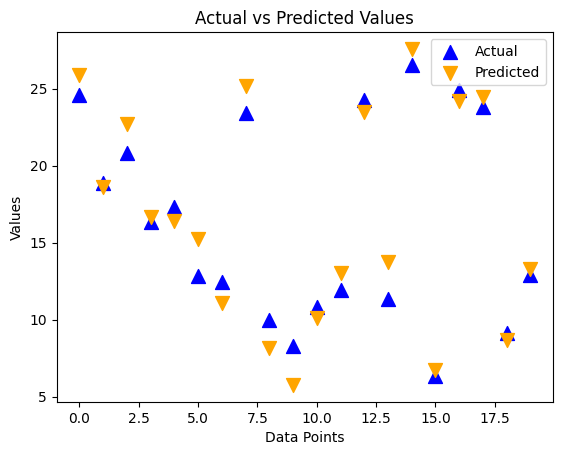

In [326]:
Actual, Predicted = predictMultiLinearReg(df)

# Create an index array for each data point
index = np.arange(len(Actual))

# Plotting Actual values above x-axis
plt.scatter(index, Actual, color='blue', marker='^', label='Actual', s=100)

# Plotting Predicted values below x-axis
plt.scatter(index, Predicted, color='orange', marker='v', label='Predicted', s=100)

# Adding Labels and Title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')

# Adding a Legend
plt.legend()

# Display the plot
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

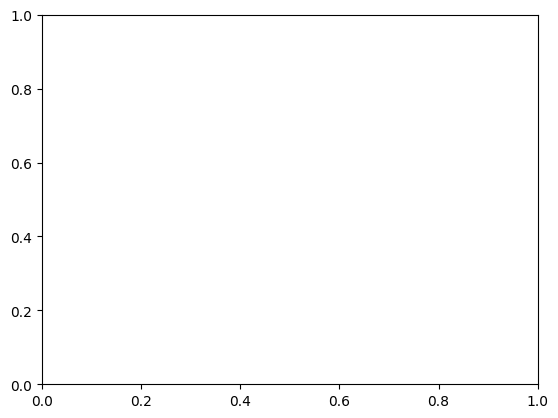

In [325]:
Actual, Predicted = predictMultiLinearReg(df)
# print(Actual, Predicted)
# Create an index array for each data point
index = np.arange(len(Actual))

# Plotting Actual values
plt.bar(index, Actual, color='blue', label='Actual')

# Plotting Predicted values
plt.bar(index, Predicted, color='orange', label='Predicted')

# Adding Labels and Title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')

# Adding a Legend
plt.legend()

# Display the plot
plt.show()